In [1]:
import os
import numpy as np
import scipy.ndimage
import skimage.feature
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
def get_gamma_channel(img):
    #R, G, B = img.transpose(2, 0, 1)
    R, G, B = scipy.ndimage.laplace(img).transpose(2, 0, 1)
    N = img.shape[0] * img.shape[1]

    Rs = R - B
    Gs = G - B

    B_m = B.mean()
    Rs_m = Rs.mean()
    Gs_m = Gs.mean()

    dRs = Rs - Rs_m
    dGs = Gs - Gs_m
    dB  = B  - B_m
    
    alpha_11 = (dRs * dRs).sum()
    alpha_22 = (dGs * dGs).sum()
    alpha_12 = (dRs * dGs).sum()
    dzeta_1 = -(dRs * dB).sum()
    dzeta_2 = -(dGs * dB).sum()
    
    delta = alpha_11 * alpha_22 - alpha_12 * alpha_12

    a = (dzeta_1 * alpha_22 - dzeta_2 * alpha_12) / delta
    b = (dzeta_2 * alpha_11 - dzeta_1 * alpha_12) / delta
    c = 1 - a - b
    
    #gamma = a*R + b*G + c*B
    gamma = a*img[..., 0] + b*img[..., 1] + c*img[..., 2]
    
    #return gamma, (a, b, c)
    print(c, b, a)
    return np.round(gamma).astype(np.uint8)

In [117]:
imgs = [cv2.imread(f'tasks/text/{name}', cv2.IMREAD_GRAYSCALE) for name in sorted(os.listdir('tasks/text'))]
imgs_gamma = [get_gamma_channel(cv2.imread(f'tasks/text/{name}')) for name in sorted(os.listdir('tasks/text'))]

0.6519970770620571 0.2711057290936033 0.07689719384433955
0.35168450128725937 0.13548208311729462 0.512833415595446
0.6827088841876414 0.035251216645359844 0.2820398991669988
0.633478622788979 -0.00964112966846556 0.37616250687948644
0.6281454142469095 0.0968270443841605 0.27502754136893004
0.802594956855416 0.1367826452158971 0.06062239792868685


([array([  0.,   2.,   0.,   1.,   0.,   0.,   0., 194., 763.,   0.]),
  array([  0.,   2.,   1.,   0.,   0.,   0.,   3., 191., 763.,   0.]),
  array([  0.,   2.,   1.,   0.,   0.,   0.,   5., 181., 771.,   0.]),
  array([  0.,   2.,   1.,   0.,   0.,   0.,   6., 186., 765.,   0.]),
  array([  0.,   3.,   0.,   0.,   0.,   1.,   3., 184., 769.,   0.]),
  array([  0.,   3.,   0.,   0.,   0.,   1.,   4., 187., 765.,   0.]),
  array([  0.,   3.,   0.,   0.,   0.,   1.,   5., 178., 773.,   0.]),
  array([  0.,   3.,   0.,   0.,   0.,   1.,   4., 180., 772.,   0.]),
  array([  0.,   3.,   0.,   0.,   1.,   0.,   3., 183., 770.,   0.]),
  array([  0.,   3.,   0.,   0.,   1.,   0.,   5., 178., 773.,   0.]),
  array([  0.,   3.,   0.,   1.,   0.,   0.,   1., 181., 774.,   0.]),
  array([  0.,   3.,   1.,   0.,   0.,   0.,   0., 184., 772.,   0.]),
  array([  0.,   3.,   1.,   0.,   0.,   0.,   0., 184., 772.,   0.]),
  array([  0.,   3.,   1.,   0.,   0.,   0.,   0., 184., 772.,   0.]),
  arra

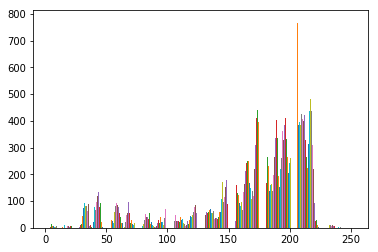

In [122]:
plt.hist(imgs[0])

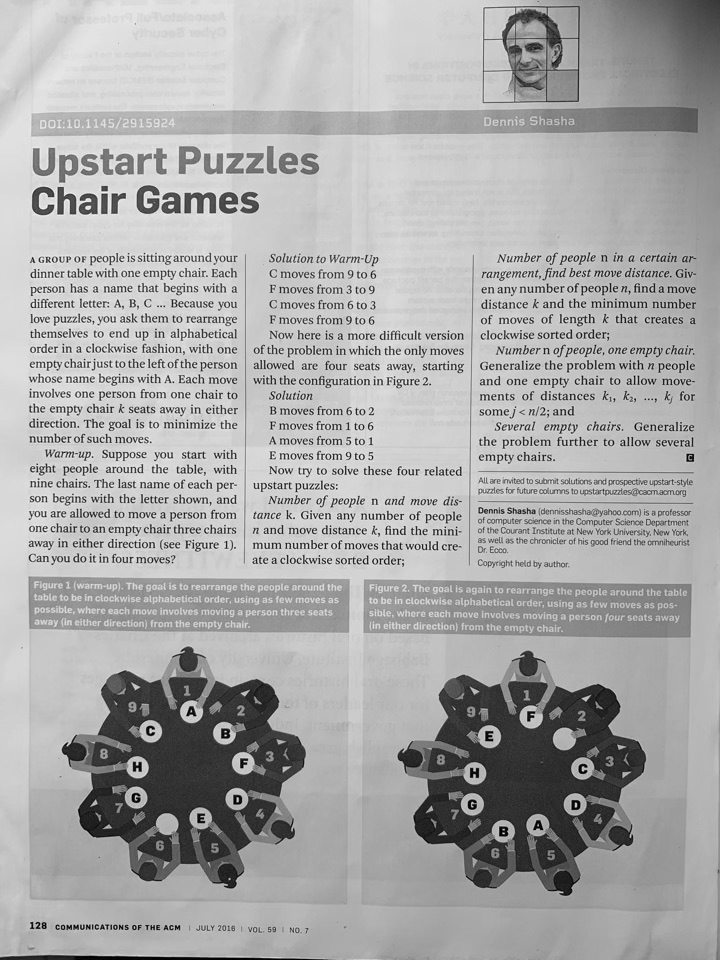

In [123]:
Image.fromarray(imgs[0])

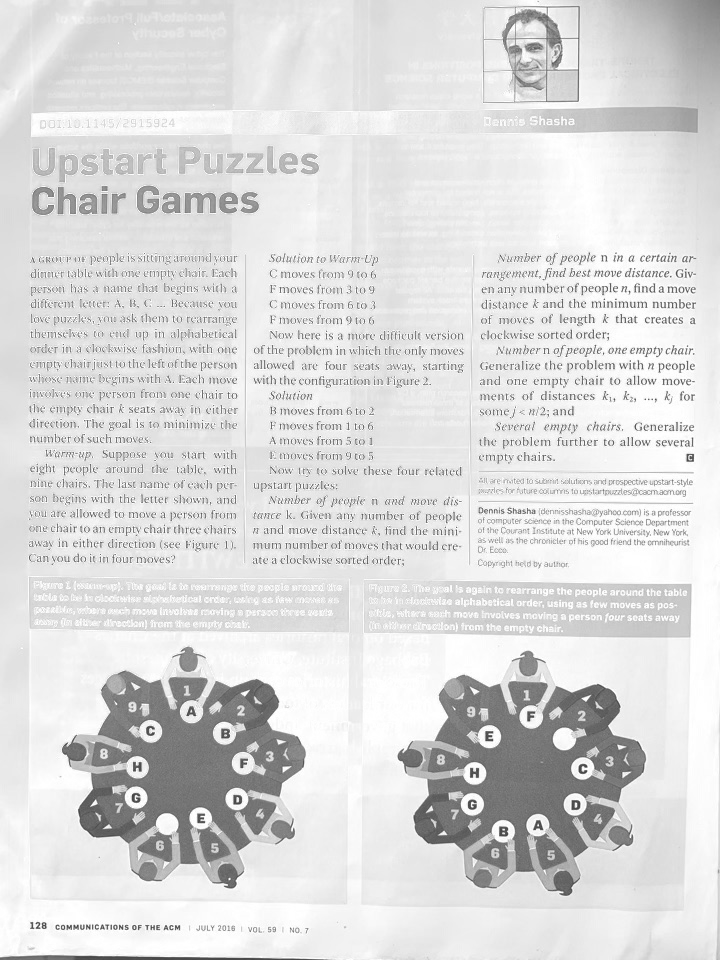

In [121]:
i = 0
diff = np.abs(imgs_gamma[i].astype(np.int32) - np.median(imgs_gamma[i].astype(np.int32)))
diff = 255 - diff
diff_normed = (diff*255/diff.max()).astype(np.uint8)
Image.fromarray(diff_normed)

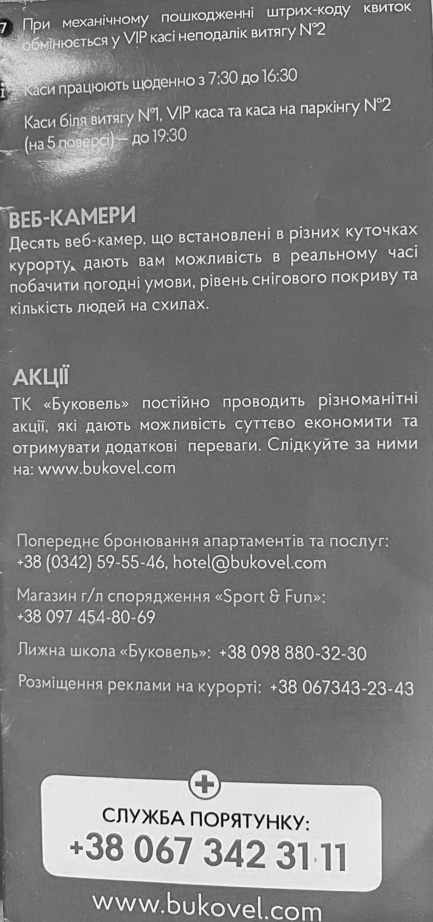

In [75]:
Image.fromarray(imgs[0])

In [7]:
imgs = [cv2.bitwise_not(img) if img.mean() < 127 else img for img in imgs]

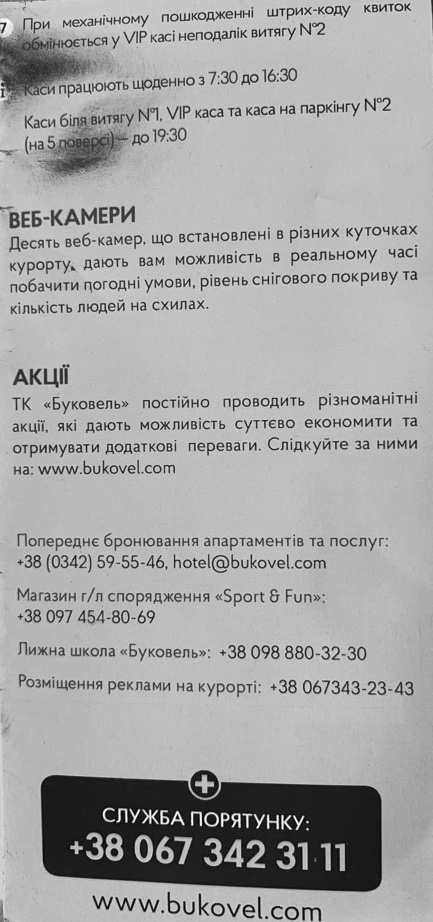

In [8]:
#for img in imgs:
#    Image.fromarray(img).show()
Image.fromarray(imgs[0])

In [43]:
thr_imgs = [cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5) for img in imgs]

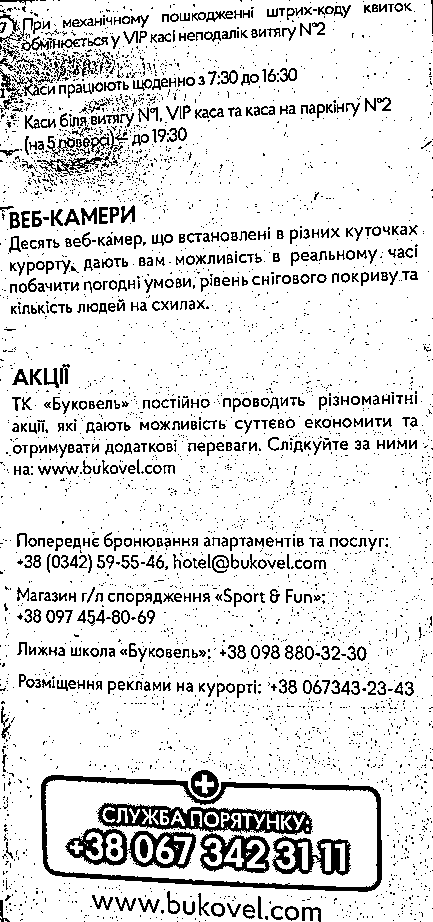

In [46]:
Image.fromarray(thr_imgs[0])

In [47]:
nlm_imgs = [cv2.fastNlMeansDenoising(thr_img,None,80,7,15) for thr_img in thr_imgs]

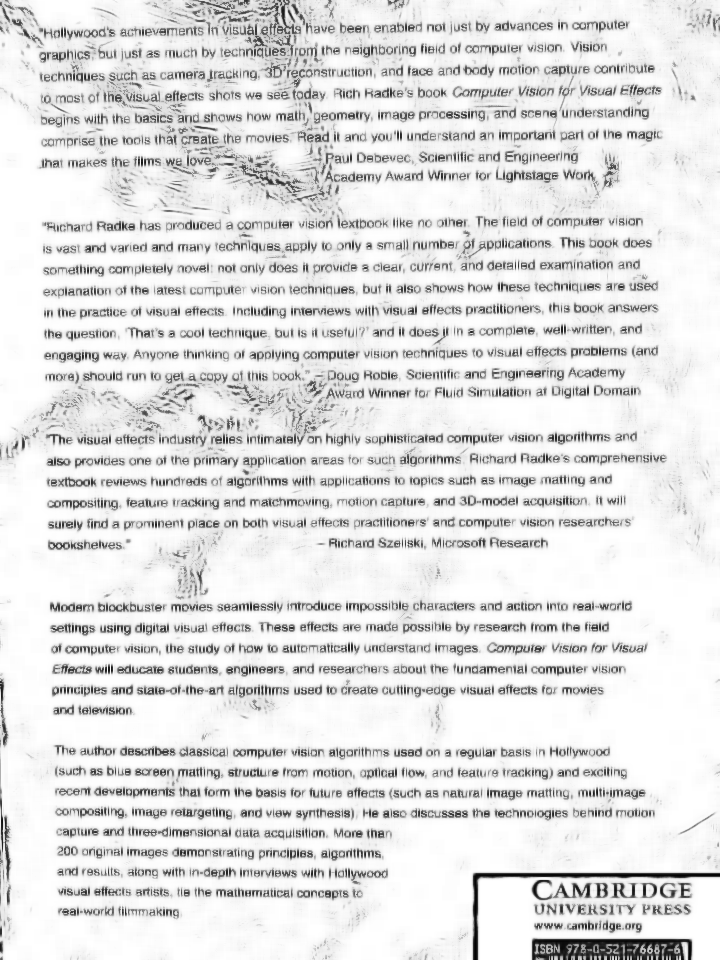

In [50]:
Image.fromarray(nlm_imgs[2])